# Part II - (Data Exploration of Bike Sales Dataset)
## by (Opeyemi Ogundile)

## Investigation Overview


> In this project I wanted to see the variables that brought it more sales for the Bike stores. Also to check if there was an impact of Cost on Revenue. I also considered profit made by different age groups. The main variables considered were Ageof customer, Country of Customer, State of Customer, Gender of Customers, Cost of products, Products, Product Category, Revenue, and Profit.

## Dataset Overview

> The dataset consist of 113,036 rows and 18 columns. After checking for duplicate it was discovered that there  are 1000 duplicated values. After removing it became 112,036 rows and 18 columns.They consist of 10 quantitative variables namely: Day, Year, Customer_Age,Order Quantity, Unit_Cost, Unit_price, Profit, Cost and Revenue and Categorical variables namely gender, state, country, products,Product_Category, Sub_Category and month.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df_sales = pd.read_csv('Sales.csv')

In [5]:
df_sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Profit made on Bike Sales)

> Profit has a long taied distribution here, with most profit between 250 and 1000. Also with few around 1000-2000. Howerver, when I plotted on log-scale, the profit distribution looks unimodal. From the distribution 400 happens to have the highest mode.

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!


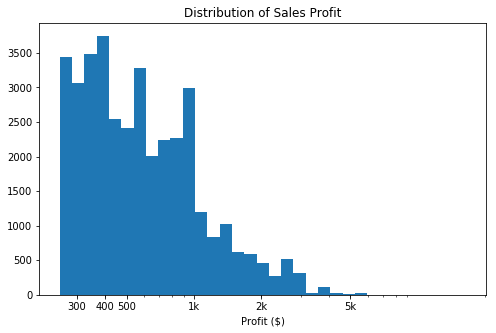

In [4]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.055
bins = 10 ** np.arange(2.4, np.log10(df_sales['Profit'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sales, x = 'Profit', bins = bins)
plt.xscale('log')
plt.xticks([ 300, 400, 500, 1e3, 2e3, 5e3,], [300, 400,500, '1k', '2k', '5k'])
plt.xlabel('Profit ($)')
plt.title('Distribution of Sales Profit')
plt.show()

## (Distribution of Customer Age)

The distribution of Customer age is skewed to the Right.

In [4]:
df_sales["Customer_Age"].mean()

35.919211578612121

In [5]:
df_sales["Customer_Age"].median()

35.0

In [6]:
df_sales["Customer_Age"].mode()

0    31
dtype: int64

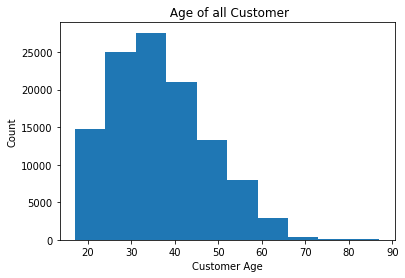

In [7]:
plt.hist(data = df_sales, x = 'Customer_Age');
plt.xlabel('Customer Age');
plt.ylabel('Count');
plt.title(" Age of all Customer");

## (The  Normal distrbution of Revenue Versus  Log transform)



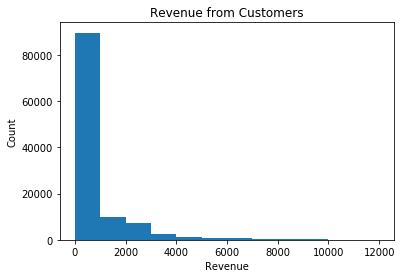

In [11]:
# Filter the df_sales to include only rows where 'Revenue' is less than or equal to 12000
df_sales_sub = df_sales[df_sales['Revenue'] <= 12000]

# Define the bin edges for the histogram based on the maximum revenue in the filtered DataFrame
bin_edges = np.arange(0, df_sales_sub['Revenue'].max() + 1000, 1000)

# Plot the histogram of 'Revenue' using the filtered DataFrame and specified bin edges
plt.hist(data=df_sales_sub, x='Revenue', bins=bin_edges)

# Set the label for the x-axis
plt.xlabel('Revenue')

# Set the label for the y-axis
plt.ylabel('Count')

# Set the title of the histogram
plt.title('Revenue from Customers')

# Display the histogram
plt.show()

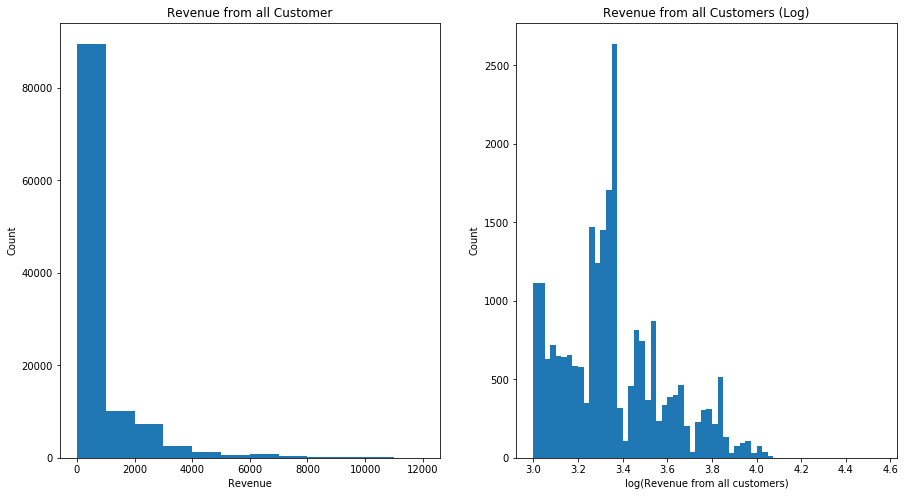

In [6]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_sales_sub['Revenue'].max()+1000, 1000)
plt.hist(data =df_sales_sub, x = 'Revenue', bins = bin_edges)
plt.xlabel('Revenue')
plt.ylabel('Count');
plt.title("Revenue from all Customer");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df_sales_sub['Revenue']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Revenue from all customers)');
plt.ylabel('Count');
plt.title("Revenue from all Customers (Log)");

###  Sales in Year
Plotting the Year agisnt frequency. It was noticed that two years 2016 and 2014) had same number of sales.

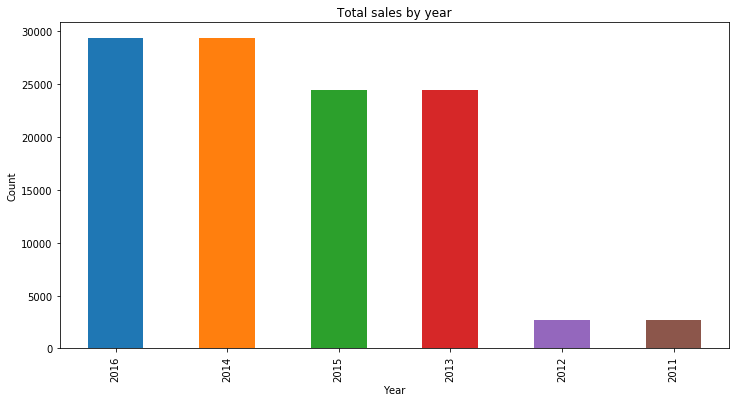

In [8]:
# Assuming you have a DataFrame called df_sales with a "Country" column
Year_sale = df_sales['Year'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
Year_sale.plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Total sales by year")

# Displaying the plot
plt.show()

### Sales by Country
From the Bar chart plot, United States Customers brought in more sales follow by Australia.

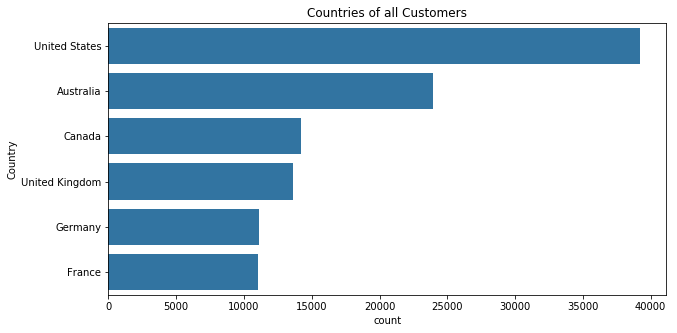

In [9]:
#Countries of all customer
# Set the figure size
plt.figure(figsize=[10, 5])

# Define the base color for the bars
base_color = sb.color_palette()[0]

# Set the title of the plot
plt.title("Countries of all Customers")

# Create the countplot
sb.countplot(data=df_sales, y='Country', color=base_color,
             order=df_sales['Country'].value_counts().index)

# Display the plot
plt.show()

### Revenue By Customer Gender
Here we plotted a violin plot that revealed which Gender brought in more sales. It was obvious that the Male customer did better than Female. However, an interesting fact will be revealed later.

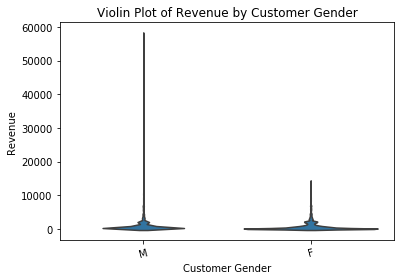

In [10]:
# Set the base color for the plot
base_color = sb.color_palette()[0]

# Create the violin plot
sb.violinplot(data=df_sales, x='Customer_Gender', y='Revenue', color=base_color, inner=None)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=15)

# Set the x-axis label
plt.xlabel('Customer Gender')

# Set the y-axis label
plt.ylabel('Revenue')

# Set the title of the plot
plt.title('Violin Plot of Revenue by Customer Gender')

# Display the plot
plt.show()

### Sales Across Age Group, Gender, Product Category 

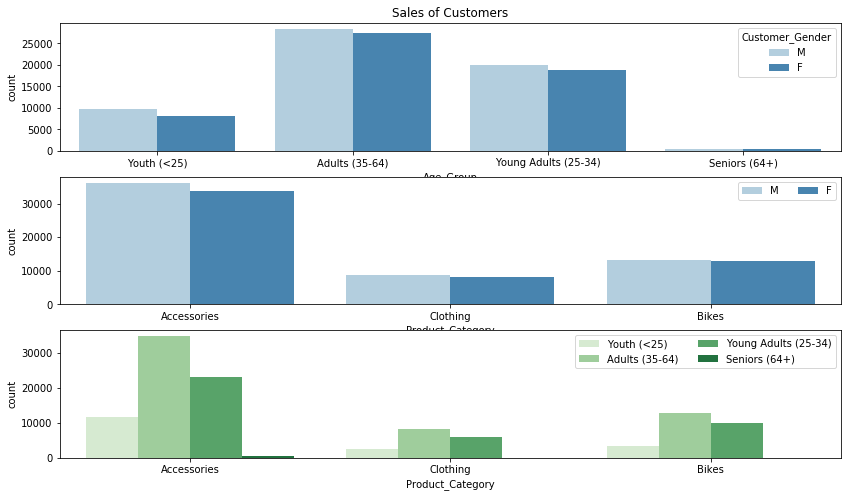

In [5]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize=[14, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_sales, x = 'Age_Group', hue = 'Customer_Gender', palette = 'Blues')
plt.title('Sales of Customers')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_sales, x = 'Product_Category', hue = 'Customer_Gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_sales, x = 'Product_Category', hue = 'Age_Group', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Relationship Between Revenue and Profit
Plotting the Corellation between Profit and Revenue showed that there is a strong correlation between the two variables.
Meaning that the higher the revenue the higher the profit made.

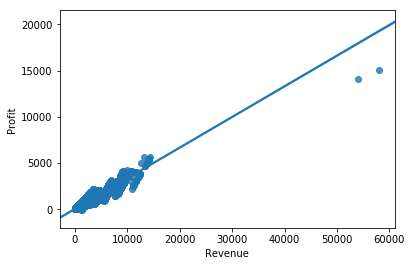

In [15]:
# Plot Correlation of Profit and Revenue
sns.regplot(data= df_sales,x='Revenue', y= 'Profit')
plt.show()

In [16]:
#  df_sales with "Revenue" and "Profit" columns
correlation = df_sales['Revenue'].corr(df_sales['Profit'])

print("Correlation coefficient between Revenue and Profit:", correlation)

Correlation coefficient between Revenue and Profit: 0.956571664074


### Relationship Between Cost and Revenue

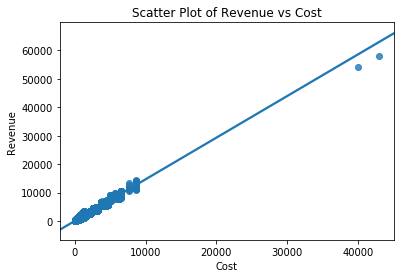

In [3]:
# df_sales with "Cost" and "Revenue" columns

sns.regplot(data=df_sales, x='Cost', y='Revenue')

plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Revenue vs Cost')

plt.show()

The above corelation result indicte clear that there is positive corelation between Cost and Revenue

### Heat Map showing Relationship between Cost and Revenue

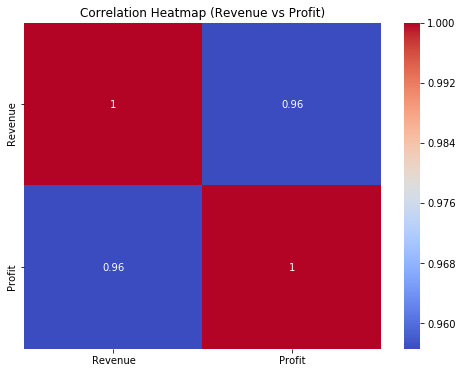

In [4]:
# df_sales with "Revenue" and "Profit" columns

# Calculate the correlation matrix
correlation_matrix = df_sales[['Revenue', 'Profit']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap (Revenue vs Profit)')
plt.show()


### Relationship Between Quantitative Variables

In [10]:
Quantitative_vars = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
Qualitative_vars = ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']

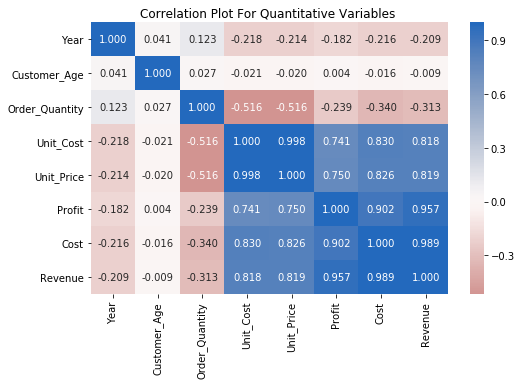

In [11]:
# correlation plot
# Set the figure size
plt.figure(figsize=[8, 5])

# Create the heatmap
sb.heatmap(df_sales[Quantitative_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)

# Add title to the plot
plt.title('Correlation Plot For Quantitative Variables ')
# Display the plot
plt.show()


### Time series of Profit by Year

In [7]:
df_filtered = df_sales[(df_sales['Year'] >= 2011) & (df_sales['Year'] <= 2016)]

In [8]:
profit_by_year = df_filtered.groupby('Year')['Profit'].sum()

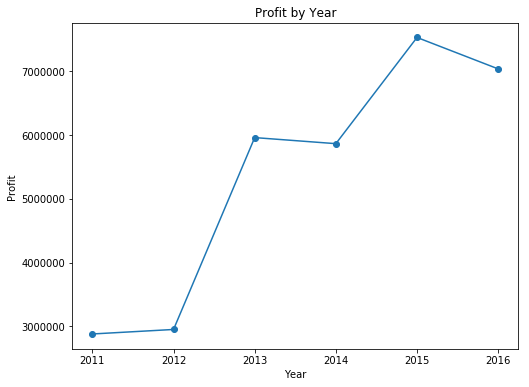

In [9]:
Year = profit_by_year.index
Profit = profit_by_year.values

# Create a figure with size 8x6
plt.figure(figsize=(8, 6))

# Plot the profit by year
plt.plot(Year, Profit, marker='o', linestyle='-')

# Set the title, x-label, and y-label
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Profit')

# Add a grid
plt.grid(False)

# Display the plot
plt.show()

### Profit across Age group and Customer gender
From the one of the previous analysis above we concluded that Male customers brings more profit. However, from the current investigation  we can see that Female customers in Adult (35-64) and young Adults (25-34) categories bring in more profit.

Text(0.5,1,'Sales Profit across Age_Group and Customer_Gender')

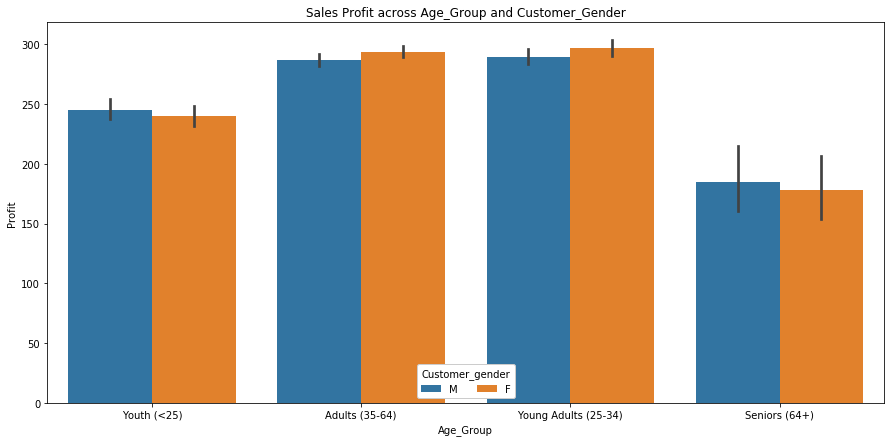

In [12]:
plt.figure(figsize=[15, 7])

# Generate the bar chart
ax = sb.barplot(data=df_sales_sub, x='Age_Group', y='Profit', hue='Customer_Gender')

# Customize the legend
ax.legend(loc=8, ncol=3, framealpha=1, title='Customer_gender')

# Set the chart title
plt.title('Sales Profit across Age_Group and Customer_Gender')

In [13]:
!jupyter nbconvert --to slides --no-input Part_II_Exploration.ipynb

[NbConvertApp] Converting notebook Part_II_Exploration.ipynb to slides
[NbConvertApp] Writing 570112 bytes to Part_II_Exploration.slides.html
